In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

c:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
root = Path('./datapoint.json')

df = pd.read_json(root)
df['class'] = df.color.copy()
df.color = df.color.apply(lambda d: "c" if d=='a' else "r")

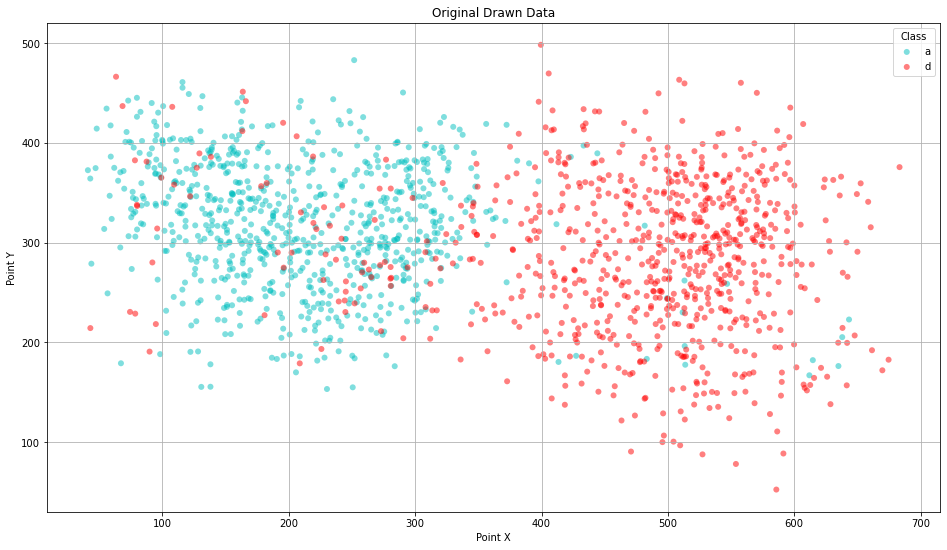

In [5]:
df_a = df[df['class'] == 'a']
df_d = df[df['class'] == 'd']
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x=df_a.x, y=df_a.y, c=df_a.color, label='a', alpha=0.5, edgecolors='None')
ax.scatter(x=df_d.x, y=df_d.y, c=df_d.color, label='d', alpha=0.5, edgecolors='None')

ax.grid(True)
ax.set_title("Original Drawn Data")
ax.set_xlabel("Point X")
ax.set_ylabel("Point Y")
ax.legend(title="Class", fancybox=True)

plt.show()

In [6]:
def make_plot():
    x_new = np.concatenate(
                            [np.random.uniform(np.min(df.iloc[:,0]), np.max(df.iloc[:,0]), (20_000, 1)),
                            np.random.uniform(np.min(df.iloc[:,1]), np.max(df.iloc[:,1]), (20_000, 1))],
                            axis=1
    )
    
    fig, ax = plt.subplots(1,5, figsize=(16,4))
    ax[0].scatter(x=df_a.x, y=df_a.y, c=df_a.color, label='a', alpha=0.5, edgecolors='None')
    ax[0].scatter(x=df_d.x, y=df_d.y, c=df_d.color, label='d', alpha=0.5, edgecolors='None')
    ax[0].set_title('Original Data')
    
    ax[1].scatter(x=x_new[:,0], y=x_new[:,1], c=classifier1.predict_proba(x_new)[:,0], s=5)
    ax[1].set_title('Classify 1')
    
    ax[2].scatter(x=x_new[:,0], y=x_new[:,1], c=classifier2.predict_proba(x_new)[0][:,0], s=5)
    ax[2].set_title('Classify 2')
    
    ax[3].scatter(x=x_new[:,0], y=x_new[:,1], c=classifier3.predict_proba(x_new)[:,1], s=5)
    ax[3].set_title('Classify 3')
    
    ax[4].scatter(x=x_new[:,0], y=x_new[:,1], c=classifier4.predict_proba(x_new)[0][:,0], s=5)
    ax[4].set_title('Classify 4')
    
    
    plt.show()
    

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


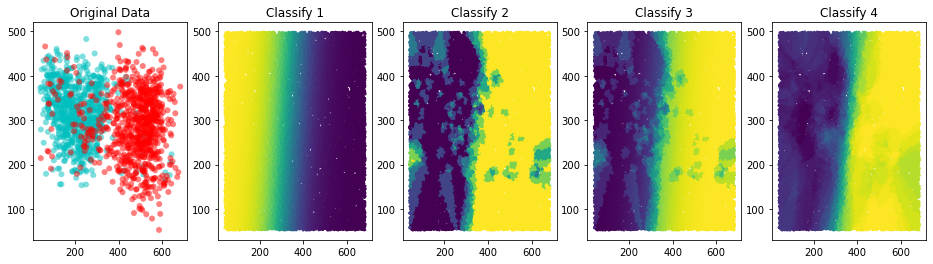

In [9]:
tfm = StandardScaler()
tfm.fit_transform(df[['x','y']])

#x_train, x_test, y_train, y_test = train_test_split(df[['x','y']], df[['class','color']], test_size=0.33, random_state=42, shuffle=True)


ohe = OneHotEncoder(handle_unknown="ignore")
after_ohe = ohe.fit_transform(df[['class']]).toarray()

classifier1 = LogisticRegression()
classifier1.fit(df[['x','y']], df[['class']])

classifier2 = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
])
classifier2.fit(df[['x','y']], after_ohe)

classifier3 = VotingClassifier(estimators=[("classifier1", classifier1), ("classifier2", classifier2)], 
                               voting= 'soft',
                               weights= [0.5, 0.5])
classifier3.fit(df[['x','y']], df[['class']])

classifier4 = GridSearchCV(estimator=classifier2,
                           param_grid={"model__n_neighbors": [i for i in range(1,50)]},
                           cv=3
                           )
classifier4.fit(df[['x','y']], after_ohe)

make_plot()

In [94]:
pd.DataFrame(classifier4.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005790,1.295497e-03,0.050608,0.011320,1,{'model__n_neighbors': 1},0.551985,0.753788,0.867424,0.724399,0.130444,48
1,0.003986,1.404052e-03,0.037720,0.003691,2,{'model__n_neighbors': 2},0.459357,0.734848,0.793561,0.662589,0.145692,49
2,0.003657,9.399872e-04,0.033577,0.002351,3,{'model__n_neighbors': 3},0.633270,0.763258,0.926136,0.774221,0.119813,45
3,0.003989,8.141988e-04,0.035253,0.002858,4,{'model__n_neighbors': 4},0.550095,0.755682,0.880682,0.728819,0.136292,47
4,0.005640,1.873693e-03,0.036570,0.000943,5,{'model__n_neighbors': 5},0.652174,0.772727,0.931818,0.785573,0.114525,44
5,0.004648,1.243113e-03,0.040239,0.001700,6,{'model__n_neighbors': 6},0.606805,0.765152,0.914773,0.762243,0.125744,46
6,0.006635,1.229719e-03,0.049535,0.007389,7,{'model__n_neighbors': 7},0.680529,0.780303,0.952652,0.804495,0.112403,42
7,0.005988,3.059447e-06,0.046540,0.004626,8,{'model__n_neighbors': 8},0.648393,0.778409,0.945076,0.790626,0.121428,43
8,0.005321,4.690773e-04,0.046601,0.002645,9,{'model__n_neighbors': 9},0.708885,0.782197,0.967803,0.819628,0.108966,39
9,0.003656,4.700808e-04,0.036569,0.005544,10,{'model__n_neighbors': 10},0.682420,0.778409,0.964015,0.808281,0.116885,41
